In [1]:
## Import List

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import re
from sklearn.preprocessing import LabelEncoder



## Importing the dataset

In [2]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Feature Engineering

In [3]:
columns=df.columns
columns
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df.drop([1,2,3,4],axis=1,inplace=True)
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns=['sentiment','data']
df.head()

,sentiment,data
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
# y=df['sentiment']
# y

In [7]:
# # Data Distribution

# # Data Distribution
# instances = df['sentiment'].value_counts()
# instances = instances.rename({0: 'Negative', 4: 'Positive'})

# plt.figure(figsize=(8, 4))
# plt.bar(instances.index, instances.values)
# plt.title("Data Distribution")
# plt.xlabel("Sentiment Label")
# plt.ylabel("Count")
# plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# plt.show()

In [8]:
# y=df['data']
# y

In [9]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem import SnowballStemmer

# stop_words = stopwords.words('english')
# stemmer = SnowballStemmer('english')

# punctuations_and_dummies = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"



# def preprocess(data, will_be_stemmed=False):
#         data = re.sub(punctuations_and_dummies, ' ', str(data).lower()).strip()
#         tokens = []
#         for token in data.split():
#             if token not in stop_words:
#                 if will_be_stemmed:
#                     tokens.append(stemmer.stem(token))
#                 else:
#                     tokens.append(token)
#         return " ".join(tokens)

# df.data = df.data.apply(lambda tw: preprocess(tw))


In [10]:
# # Remove 0 length tweets
# df = df[df.iloc[:,1].astype(str).str.len()!=0]

In [11]:
# tweets_len = [len(x) for x in df['data']]
# pd.Series(tweets_len).hist()
# plt.show()
# pd.Series(tweets_len).describe()

In [12]:
# all_str = ""
# for i in df.data:
#     all_str += i



In [13]:
# from collections import Counter

# letter_list = list(all_str)
# my_counter = Counter(letter_list)

# letter_df = pd.DataFrame.from_dict(my_counter, orient='index').reset_index()
# letter_df = letter_df.rename(columns={'index':'letter', 0:'frequency'})
# letter_df = letter_df.loc[letter_df['letter'].isin(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])]
# letter_df['all_tweets_relative_freq']=letter_df['frequency']/letter_df['frequency'].sum()
# letter_df = letter_df.sort_values('letter')

# english = pd.read_csv('letter_frequency_en_US.csv')
# english['expected_relative_frequency'] = english['count']/english['count'].sum()
# english = english.drop(['count'], axis=1)

# letter_df = pd.merge(letter_df, english, on='letter')
# letter_df['expected'] = np.round(letter_df['expected_relative_frequency']*letter_df['frequency'].sum(),0)
# letter_df = letter_df.reset_index().drop(['index'], axis=1)
# letter_df

In [14]:
# letter_df.plot(x="letter", y=["all_tweets_relative_freq", "expected_relative_frequency"], kind="barh", figsize=(12,8))

In [15]:
# letter_df[['frequency', 'expected']].corr()

In [16]:
# df1 = df.copy()

# df1['number_of_characters'] = [len(tw) for tw in df1.data]
# df1

In [17]:
# df1.number_of_characters.max()

In [18]:
# df1.number_of_characters.min()

In [19]:
# df1.number_of_characters.mean()

In [20]:
# df1.number_of_characters.std()

In [21]:
# df1['number_of_words'] = [len(tw.split()) for tw in df1.data]
# df1

In [22]:
# df1.number_of_words.max()

In [23]:
# df1.number_of_words.min()

In [24]:
# df1.number_of_words.mean()

In [25]:
# df1.number_of_words.std()

In [26]:
### Word Count

In [27]:
# import collections
# from wordcloud import WordCloud
# from nltk import word_tokenize, sent_tokenize
# from nltk.util import ngrams

# all_tweets = ' '.join(df['data'].str.lower())

# f_words = [word for word in all_tweets.split()]
# counted_words = collections.Counter(f_words)

# words = []
# counts = []
# for letter, count in counted_words.most_common(20):
#     words.append(letter)
#     counts.append(count)

# plt.figure(figsize = (16, 4))
# plt.title('Most common words in whole tweets')
# plt.xlabel('Count')
# plt.ylabel('Words')
# plt.bar(words, counts)

In [28]:
# df.sentiment == 4

In [29]:
# all_tweets = ' '.join(df[df.sentiment == 4].data.str.lower())

# f_words = [word for word in all_tweets.split()]
# counted_words = collections.Counter(f_words)

# words = []
# counts = []
# for letter, count in counted_words.most_common(20):
#     words.append(letter)
#     counts.append(count)

# plt.figure(figsize = (16, 4))
# plt.title('Most common words in positive tweets')
# plt.xlabel('Count')
# plt.ylabel('Words')
# plt.bar(words, counts)

In [30]:
# plt.figure(figsize = (25, 25))
# plt.axis('off')
# wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.sentiment == 4].data))
# plt.imshow(wordcloud_fig, interpolation = 'bilinear')

In [31]:

# # Selecting negative sentiment tweets and converting them to lowercase
# all_tweets = ' '.join(df[df.sentiment == 0].data.str.lower())

# # Splitting the tweets into words and excluding one-letter words
# f_words = [word for word in all_tweets.split() if len(word) > 1]

# # Counting the occurrences of each word
# counted_words = collections.Counter(f_words)

# # Extracting the most common 20 words and their counts
# words = []
# counts = []
# for word, count in counted_words.most_common(20):
#     words.append(word)
#     counts.append(count)

# # Plotting the most common words
# plt.figure(figsize=(16, 4))
# plt.bar(words, counts)
# plt.title('Most Common Words in Negative Tweets')
# plt.xlabel('Words')
# plt.ylabel('Count')
# plt.show()


In [32]:
# from wordcloud import WordCloud

# plt.figure(figsize = (25, 25))
# plt.axis('off')
# wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.sentiment == 0].data))
# plt.imshow(wordcloud_fig, interpolation = 'bilinear')

## Splitting the dataset in train and test split

In [12]:
y=df['sentiment']

NameError: name 'df' is not defined

In [34]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)


DF Train Shape:  (1072000,)
DF Test Shape:  (528000,)
Y Train Shape:  (1072000,)
Y Test Shape:  (528000,)


## Building deep learn model

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [36]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 527470 number of independent tokens


In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(1072000, 116)

In [38]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(528000, 116)

In [39]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [40]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 embedding (Embedding)       (None, 116, 20)           10549420  
                                                                 
 conv1d (Conv1D)             (None, 114, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 38, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 64)           0         
 1D)                                                         

## Training the model

In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)


Epoch 1/5
 4290/10720 [===========>..................] - ETA: 5:54 - loss: 0.3884 - accuracy: 0.8252

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



10720/10720 [==============================] - 592s 55ms/step - loss: 0.3886 - accuracy: 0.8247 - val_loss: 0.3974 - val_accuracy: 0.8194
Epoch 3/5
 7324/10720 [===================>..........] - ETA: 3:00 - loss: 0.3459 - accuracy: 0.8476

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [42]:
y_pred=model.predict(data_test)
y_pred

16500/16500 [==============================] - 29s 2ms/step


array([[5.7293910e-01, 5.3387476e-13, 5.6890652e-13, 4.8629888e-13,
        4.2706102e-01],
       [7.2427303e-01, 5.3230846e-31, 5.9139154e-31, 3.3891131e-31,
        2.7572697e-01],
       [5.8064532e-01, 1.5146688e-24, 1.1531964e-24, 8.9222998e-25,
        4.1935468e-01],
       ...,
       [6.9108182e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9308914e-01],
       [7.7361935e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.2638065e-01],
       [7.1156496e-01, 6.5430517e-31, 7.7476315e-31, 4.3237038e-31,
        2.8843501e-01]], dtype=float32)

In [43]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

## Scoring 

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(50.722222222222214, 0.5, 'y_pred')

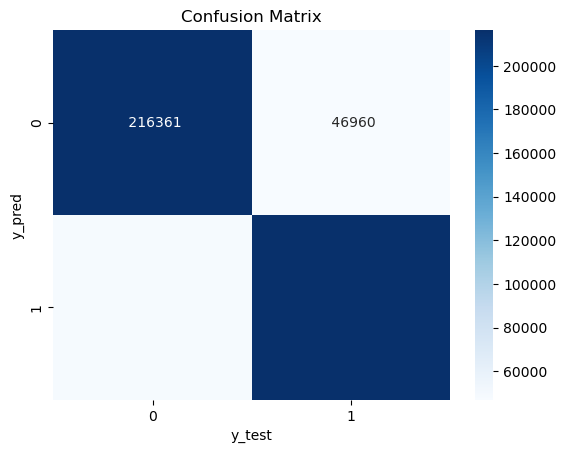

In [45]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82    263321
           4       0.82      0.82      0.82    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000



## CNN Model Evaluation

16500/16500 [==============================] - 29s 2ms/step


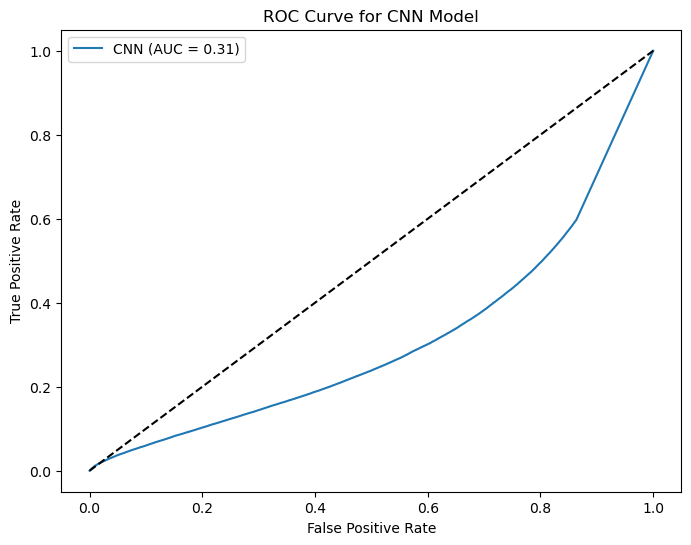

In [47]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Convert y_test to binary values (0 and 1)
y_test_binary = np.where(y_test == 0, 0, 1)

# CNN Model Evaluation
y_pred_proba_cnn = model.predict(data_test)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_binary, y_pred_proba_cnn[:, 1])
auc_cnn = roc_auc_score(y_test_binary, y_pred_proba_cnn[:, 1])

# Plot ROC curve for CNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc='best')
plt.show()



CNN Confusion Matrix:
[[216361  46960]
 [ 48306 216373]]
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82    263321
           4       0.82      0.82      0.82    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000



Text(50.722222222222214, 0.5, 'y_pred')

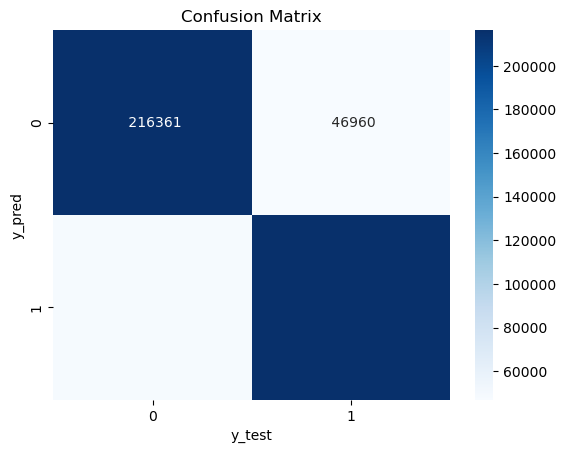

In [48]:
# Confusion Matrix for CNN

# Confusion matrix for CNN
y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
print('CNN Confusion Matrix:')
print(cm_cnn)

# Classification report for CNN
print('CNN Classification Report:')
print(classification_report(y_test, y_pred_cnn))

cm=confusion_matrix(y_test,y_pred_cnn)
ax=sns.heatmap(cm_cnn,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')



## Long Short-Term Memory (LSTM)

In [49]:
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential

max_len = 100  # Maximum length of the input sequences

# Define the LSTM model
model = Sequential()
model.add(Embedding(V+1, D, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Pad the sequences to a fixed length
X_train = pad_sequences(sequence_train, maxlen=max_len)
X_test = pad_sequences(sequence_test, maxlen=max_len)

# Train the model
lstm_senti = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the model
print(classification_report(y_test, y_pred))

Epoch 1/5
8375/8375 [==============================] - 977s 116ms/step - loss: 0.4469 - accuracy: 0.7898 - val_loss: 0.4107 - val_accuracy: 0.8112
Epoch 2/5
8375/8375 [==============================] - 903s 108ms/step - loss: 0.3845 - accuracy: 0.8258 - val_loss: 0.3959 - val_accuracy: 0.8197
Epoch 4/5
8375/8375 [==============================] - 898s 107ms/step - loss: 0.3737 - accuracy: 0.8316 - val_loss: 0.3893 - val_accuracy: 0.8233
Epoch 5/5
14238/16500 [========================>.....] - ETA: 27s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



              precision    recall  f1-score   support

           0       0.82      0.83      0.82    263321
           4       0.83      0.82      0.82    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000



## LSTM Model Evaluation

In [50]:
classes = np.unique(y_test)
n_classes = len(classes)
n_classes

2

16500/16500 [==============================] - 202s 12ms/step


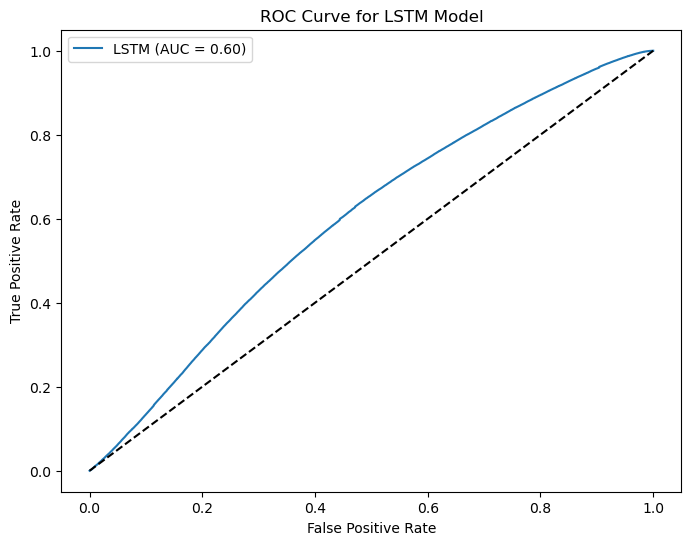

In [51]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Convert y_test to binary values (0 and 1)
y_test_binary = np.where(y_test == 0, 0, 1)

# LSTM Model Evaluation
y_pred_proba_lstm = model.predict(X_test)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_binary, y_pred_proba_lstm[:, 1])
auc_lstm = roc_auc_score(y_test_binary, y_pred_proba_lstm[:, 1])

# Plot ROC curve for LSTM
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model')
plt.legend(loc='best')
plt.show()

# Confusion matrix for LSTM


LSTM Confusion Matrix:
[[217669  45652]
 [ 46869 217810]]
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82    263321
           4       0.83      0.82      0.82    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000



Text(50.722222222222214, 0.5, 'y_pred')

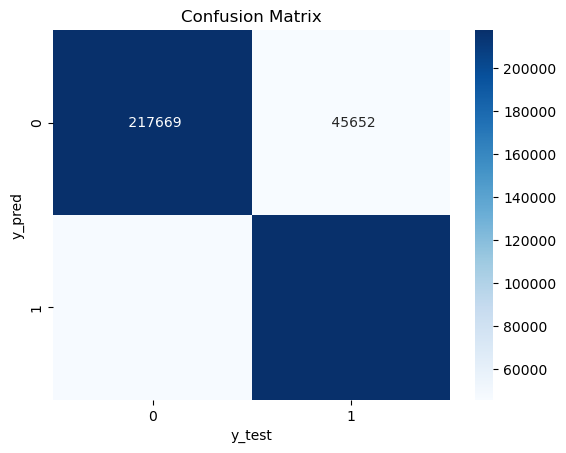

In [52]:
# Confusion Matrix for LSTM
y_pred_lstm = np.argmax(y_pred_proba_lstm, axis=1)
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
print('LSTM Confusion Matrix:')
print(cm_lstm)

# Classification report for LSTM
print('LSTM Classification Report:')
print(classification_report(y_test, y_pred_lstm))

cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

## RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Convert text data to numerical features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(df_train)
X_test = vectorizer.transform(df_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

In [61]:
# Assuming y_test contains non-binary labels, convert it to binary
y_test_binary = np.where(y_test == 0, 0, 1)

# Compute ROC curve and AUC for Random Forest Model
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_pred_proba_rf[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)

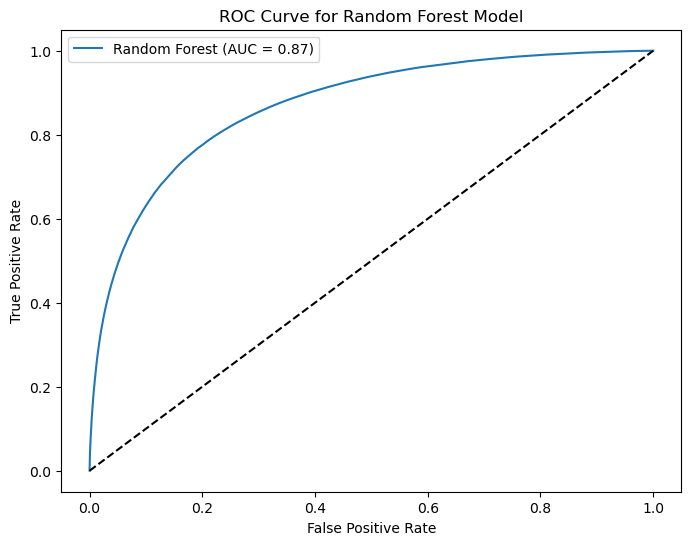

In [62]:
# Plot ROC curve for Random Forest Model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='best')
plt.show()


In [63]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Random Forest Confusion Matrix:')
print(cm_rf)


Random Forest Confusion Matrix:
[[212749  50572]
 [ 61427 203252]]


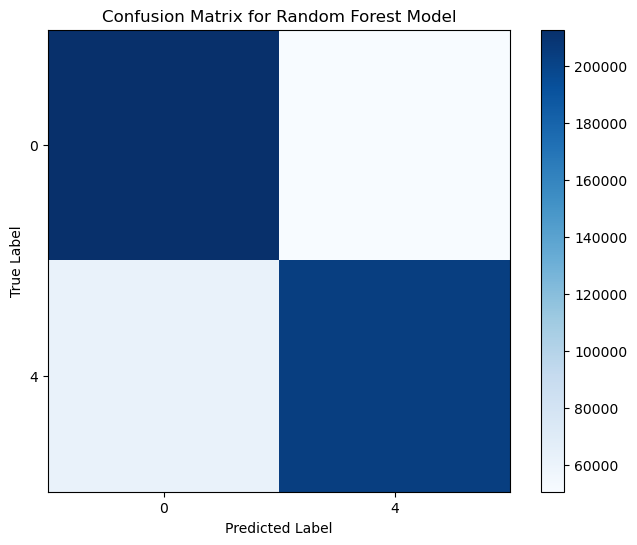

In [64]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [65]:
# Classification report
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79    263321
           4       0.80      0.77      0.78    264679

    accuracy                           0.79    528000
   macro avg       0.79      0.79      0.79    528000
weighted avg       0.79      0.79      0.79    528000



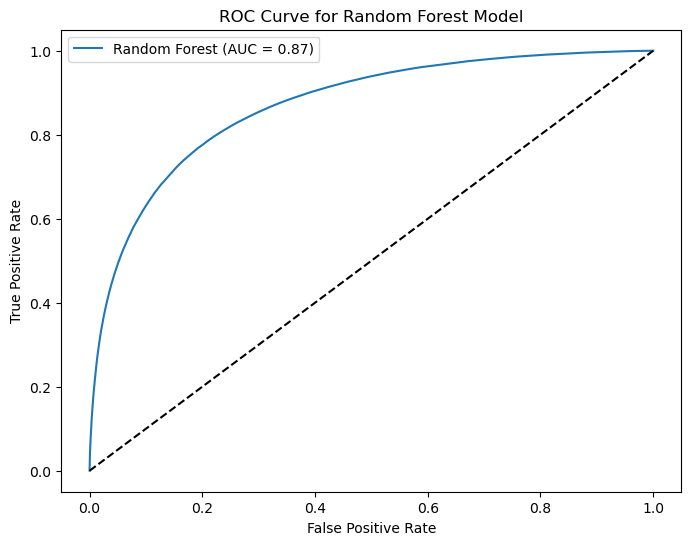

Random Forest Confusion Matrix:
[[212749  50572]
 [ 61427 203252]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79    263321
           4       0.80      0.77      0.78    264679

    accuracy                           0.79    528000
   macro avg       0.79      0.79      0.79    528000
weighted avg       0.79      0.79      0.79    528000



In [66]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Convert y_test to binary values (0 and 1)
y_test_binary = np.where(y_test == 0, 0, 1)

# Random Forest Model Evaluation
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test_binary, y_pred_proba_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='best')
plt.show()

# Confusion matrix for Random Forest
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Random Forest Confusion Matrix:')
print(cm_rf)

# Classification report for Random Forest
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

## DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print('Decision Tree Classifier Classification Report:')
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72    263321
           4       0.72      0.72      0.72    264679

    accuracy                           0.72    528000
   macro avg       0.72      0.72      0.72    528000
weighted avg       0.72      0.72      0.72    528000



In [68]:
# Convert y_test to binary values (0 and 1)
y_test_binary = np.where(y_test == 0, 0, 1)

In [69]:
# Compute ROC curve and AUC
y_pred_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test_binary, y_pred_proba_dt)

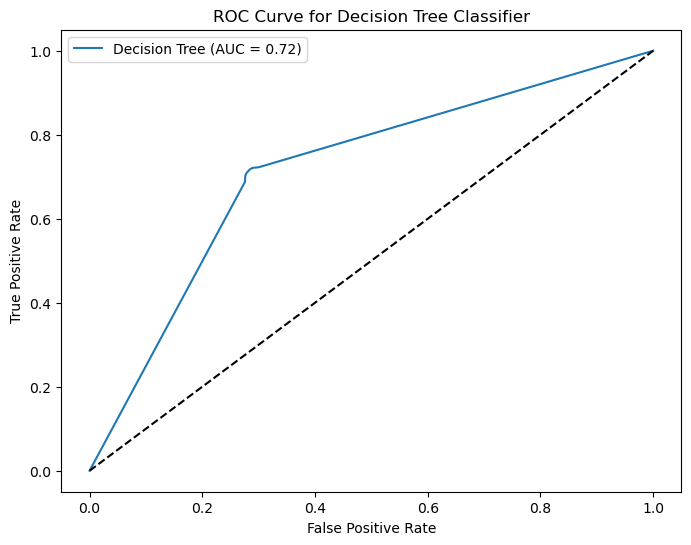

In [70]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='best')
plt.show()

In [71]:
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print('Decision Tree Confusion Matrix:')
print(cm_dt)

Decision Tree Confusion Matrix:
[[188568  74753]
 [ 74922 189757]]


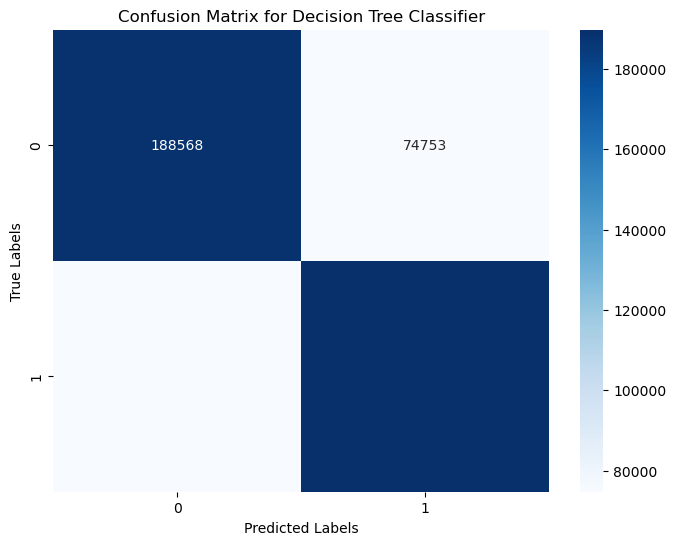

In [72]:
# Visualization of the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix for Decision Tree Classifier')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

## SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Train SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_model.predict(X_test)
y_pred_proba_svc = svc_model.decision_function(X_test)

# Assuming y_test contains non-binary labels, convert it to binary
y_test_binary = np.where(y_test == 0, 0, 1)

# Compute ROC curve and AUC for SVC Model
fpr_svc, tpr_svc, _ = roc_curve(y_test_binary, y_pred_proba_svc)
auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve for SVC Model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC Model')
plt.legend(loc='best')
plt.show()

# Confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print('SVC Confusion Matrix:')
print(cm_svc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_svc, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVC Model')
plt.show()

# Classification report
print('SVC Classification Report:')
print(classification_report(y_test, y_pred_svc))

## Logistic Regression Model

In [9]:
df

NameError: name 'df' is not defined

In [8]:
# Split the data into training and testing sets
X = df['data']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

NameError: name 'df' is not defined

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)

# Assuming y_test contains non-binary labels, convert it to binary
y_test_binary = np.where(y_test == 0, 0, 1)

# Compute ROC curve and AUC for Logistic Regression Model
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_pred_proba_lr[:, 1])
auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for Logistic Regression Model
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='best')
plt.show()

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Logistic Regression Confusion Matrix:')
print(cm_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_lr, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Classification report
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

NameError: name 'X_train' is not defined